

## 1.   Import Libraries




In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV

In [ ]:
# Step 2: Load the Dataset
df = pd.read_csv('/content/Amazon-Product-Reviews - Amazon Product Review (1).csv')
# Display the first few rows of the dataset
print(df.head())

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     11555559  R1QXC7AHHJBQ3O  B00IKPX4GY         2693241   
1          US     31469372  R175VSRV6ZETOP  B00IKPYKWG         2693241   
2          US     26843895  R2HRFF78MWGY19  B00IKPW0UA         2693241   
3          US     19844868   R8Q39WPKYVSTX  B00LCHSHMS         2693241   
4          US      1189852  R3RL4C8YP2ZCJL  B00IKPZ5V6         2693241   

                           product_title product_category  star_rating  \
0  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            5   
1  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            3   
2  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            5   
3  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            4   
4  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            5   

   helpful_votes  total_votes vine verified_purchase  \
0              0            0    N                 Y  

In [ ]:
# Step 3: Data Analysis
print("\nBasic Information:")
print(df.info())  # Show data types and non-null counts

print("\nSummary Statistics:")
print(df.describe())  # Summary statistics for numerical columns

# Check for null values
print("\nNull Values in Each Column:")
print(df.isnull().sum())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30842 entries, 0 to 30841
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_body  30842 non-null  object
 1   sentiment    30842 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 482.0+ KB
None

Summary Statistics:
          sentiment
count  30842.000000
mean       0.835354
std        0.370866
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000

Null Values in Each Column:
review_body    0
sentiment      0
dtype: int64


In [ ]:
# Step 2: Data Preprocessing and Cleaning
df = df[['review_body', 'sentiment']].copy()  # Selecting relevant columns
df = df.dropna(subset=['review_body']).reset_index(drop=True)  # Drop missing values
print(f"Dataset shape after cleaning: {df.shape}")
# Check for missing values
print(df.isnull().sum())




Dataset shape after cleaning: (30842, 2)
review_body    0
sentiment      0
dtype: int64


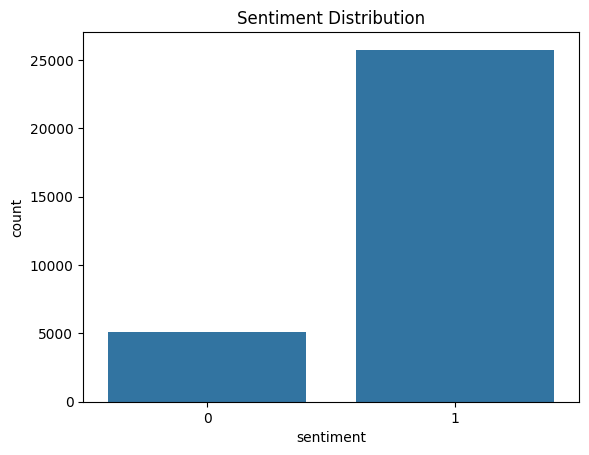

In [ ]:
# Visualize the distribution of the target column (sentiment)
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


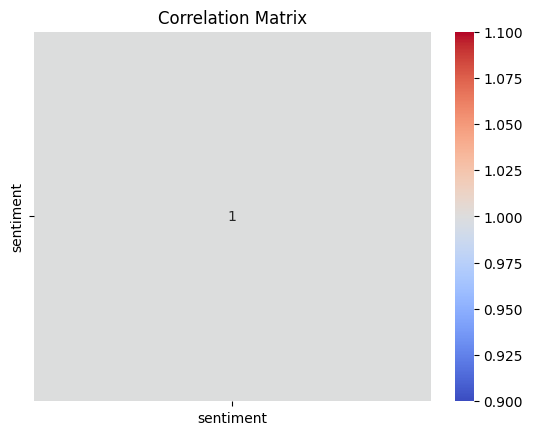

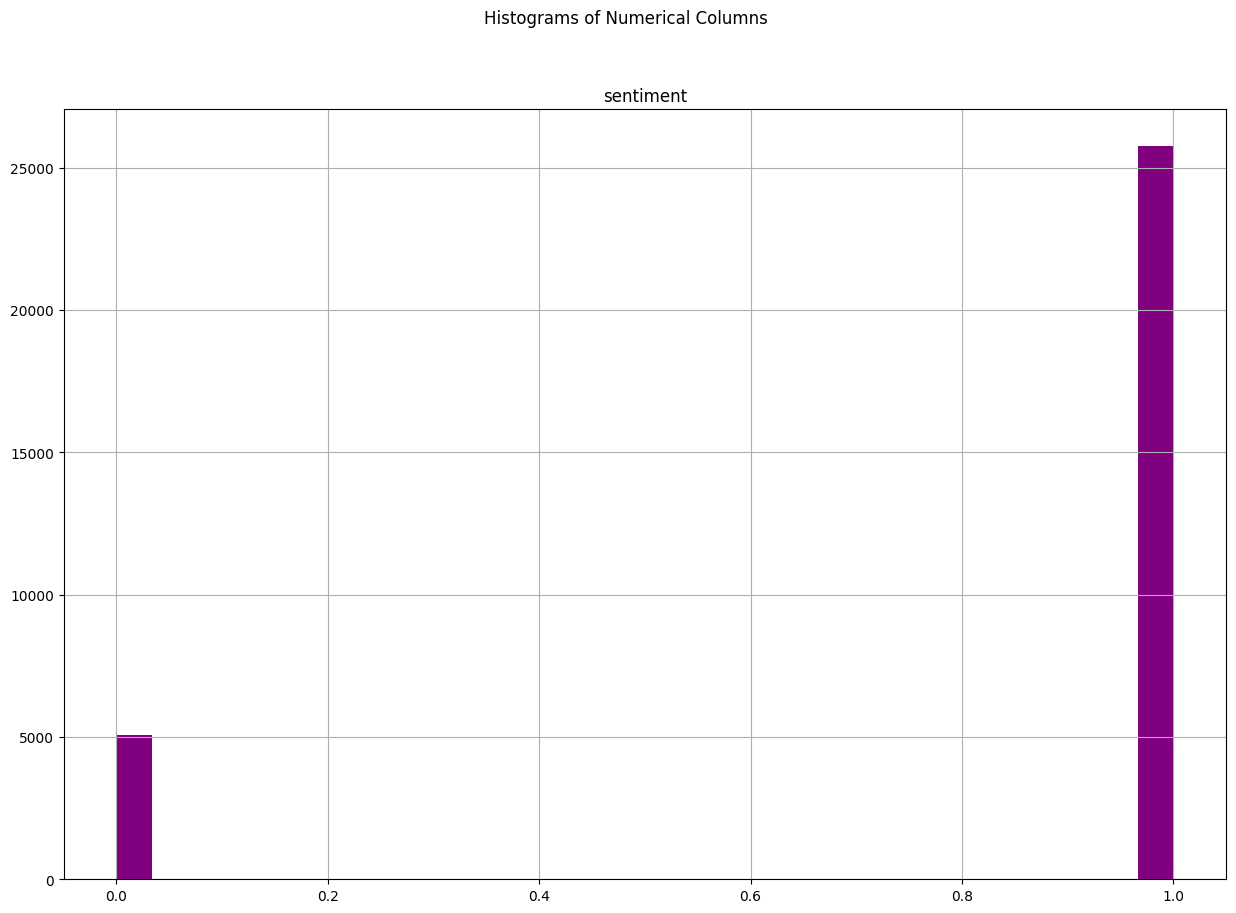

In [ ]:
# Train-Test Split Visualization (after splitting the data, we'll visualize the data later)
# Convert 'sentiment' to numerical representation if it's categorical
if df['sentiment'].dtype == object: # Check if 'sentiment' is of object type (likely categorical)
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['sentiment_encoded'] = le.fit_transform(df['sentiment']) # Create new numerical column
    correlation_matrix = df[['sentiment_encoded']].corr() # Calculate correlation for numerical columns
else:
    correlation_matrix = df[['sentiment']].corr() # Calculate correlation for numerical columns


sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Optional: Histogram of numerical columns (if any numerical features exist)
numerical_columns = df.select_dtypes(include=['number']).columns
if len(numerical_columns) > 0: # Check if there are numerical columns
    df[numerical_columns].hist(bins=30, figsize=(15, 10), color='purple')
    plt.suptitle("Histograms of Numerical Columns")
    plt.show()
else:
    print("No numerical columns found for histogram.")

In [ ]:
# Step 4: Text Vectorization with TF-IDF
X = df['review_body']  # Input text
y = df['sentiment']    # Target variable

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train

,review_body
21740,I don't like the fact that items cannot be del...
18692,Great
21008,Works very well but I haven't been able to cha...
14124,I love my Kindle Fire HD tablet and use it eve...
28448,TOO MUCH ADVERTISING!!!
...,...
9085,"Terrible battery drain,had less than a week on..."
20567,I is a little hard in finding out how to work it.
28204,Loving it
2410,This is my third one. Was not impressed with t...


In [ ]:
X_test

,review_body
7808,Best value for any tablet on market!!!
19199,100% happy.<br />Has all I was looking for + M...
29498,love it
9205,I like the new Kindle hd 7......but I absolute...
14770,It's great ... extremely easy to use. Excelle...
...,...
21225,Works great.
2810,My son loves it!
22934,My husband got this for me for Christmas and I...
20349,"Wasn't looking for much: videos, newspapers, e..."


In [ ]:
y_train

,sentiment
21740,0
18692,1
21008,1
14124,1
28448,0
...,...
9085,0
20567,0
28204,1
2410,1


In [ ]:
y_test

,sentiment
7808,1
19199,1
29498,1
9205,1
14770,1
...,...
21225,1
2810,1
22934,1
20349,1


In [ ]:
# Initialize TF-IDF Vectorizer with 5000 max features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
X_train_tfidf

<24673x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 302823 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf

<6169x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 73406 stored elements in Compressed Sparse Row format>

In [ ]:
# Step 8: Different Classification Algorithms
# Initialize models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
gradient_boost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)

# Train and evaluate each model
models = {'Logistic Regression': log_reg, 'Random Forest': random_forest, 'Gradient Boosting': gradient_boost}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)
    print(f"\n{model_name} trained successfully.")



Logistic Regression trained successfully.

Random Forest trained successfully.

Gradient Boosting trained successfully.



Logistic Regression trained successfully.

Logistic Regression Accuracy: 0.9044

Confusion Matrix for Logistic Regression:


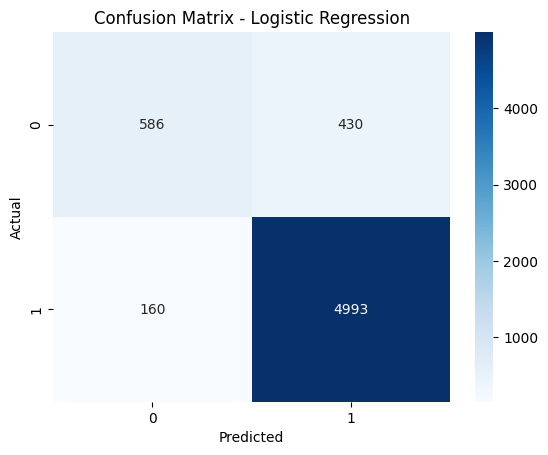


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.58      0.67      1016
           1       0.92      0.97      0.94      5153

    accuracy                           0.90      6169
   macro avg       0.85      0.77      0.80      6169
weighted avg       0.90      0.90      0.90      6169


Random Forest trained successfully.

Random Forest Accuracy: 0.8909

Confusion Matrix for Random Forest:


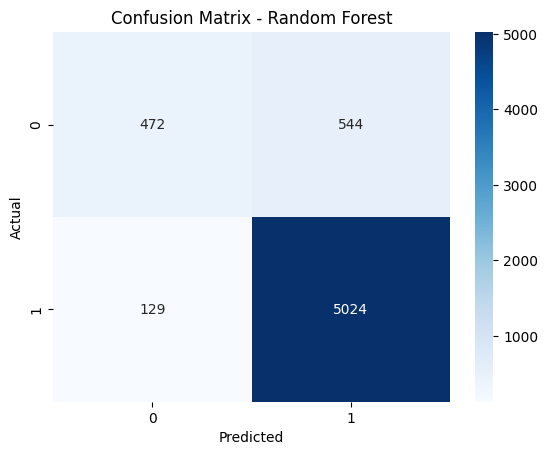


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.46      0.58      1016
           1       0.90      0.97      0.94      5153

    accuracy                           0.89      6169
   macro avg       0.84      0.72      0.76      6169
weighted avg       0.88      0.89      0.88      6169


Gradient Boosting trained successfully.

Gradient Boosting Accuracy: 0.8839

Confusion Matrix for Gradient Boosting:


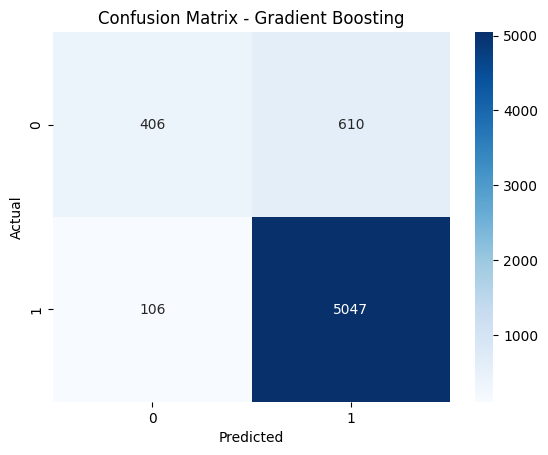


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.79      0.40      0.53      1016
           1       0.89      0.98      0.93      5153

    accuracy                           0.88      6169
   macro avg       0.84      0.69      0.73      6169
weighted avg       0.88      0.88      0.87      6169



In [ ]:
# Step 8: Different Classification Algorithms
# Initialize models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
gradient_boost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)

# Train and evaluate each model
models = {'Logistic Regression': log_reg, 'Random Forest': random_forest, 'Gradient Boosting': gradient_boost}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)
    print(f"\n{model_name} trained successfully.")

    # Step 9: Predicting Outcome #Moved this block into the for loop
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.4f}")

    # Step 10: Confusion Matrix and Classification Report
    print(f"\nConfusion Matrix for {model_name}:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

In [ ]:
# Step 5: Hyperparameter Tuning for Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}
grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, scoring='accuracy', cv=5, verbose=3)
grid_logreg.fit(X_train_tfidf, y_train)
best_logreg = grid_logreg.best_estimator_
print("Best Logistic Regression Parameters:", grid_logreg.best_params_)
print("Best Logistic Regression Cross-Validated Score:", grid_logreg.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..........C=0.01, solver=liblinear;, score=0.835 total time=   0.0s
[CV 2/5] END ..........C=0.01, solver=liblinear;, score=0.835 total time=   0.0s
[CV 3/5] END ..........C=0.01, solver=liblinear;, score=0.835 total time=   0.0s
[CV 4/5] END ..........C=0.01, solver=liblinear;, score=0.835 total time=   0.1s
[CV 5/5] END ..........C=0.01, solver=liblinear;, score=0.835 total time=   0.0s
[CV 1/5] END ..............C=0.01, solver=lbfgs;, score=0.835 total time=   0.0s
[CV 2/5] END ..............C=0.01, solver=lbfgs;, score=0.835 total time=   0.0s
[CV 3/5] END ..............C=0.01, solver=lbfgs;, score=0.835 total time=   0.0s
[CV 4/5] END ..............C=0.01, solver=lbfgs;, score=0.835 total time=   0.0s
[CV 5/5] END ..............C=0.01, solver=lbfgs;, score=0.835 total time=   0.0s
[CV 1/5] END ...........C=0.1, solver=liblinear;, score=0.858 total time=   0.1s
[CV 2/5] END ...........C=0.1, solver=liblinear;

In [ ]:
# Step 6: Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, scoring='accuracy', cv=5, verbose=3)
grid_rf.fit(X_train_tfidf, y_train)
best_rf = grid_rf.best_estimator_
print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best Random Forest Cross-Validated Score:", grid_rf.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.891 total time=  14.0s
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.886 total time=  13.5s
[CV 3/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.886 total time=  14.2s
[CV 4/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.887 total time=  13.5s
[CV 5/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.887 total time=  13.6s
[CV 1/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.893 total time=  28.0s
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.884 total time=  26.9s
[CV 3/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.887 total time=  28.5s
[CV 4/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.888 total time=  27.1s
[CV 5/5] END max_depth=None, min_samples_sp

In [ ]:
# Step 7: Train Gradient Boosting Model
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gbc.fit(X_train_tfidf, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [ ]:
# Step 8: Model Evaluation - Define Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

     # Plotting the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



Model: Tuned Logistic Regression
Accuracy: 0.90
Precision: 0.92
Recall: 0.97
F1 Score: 0.94


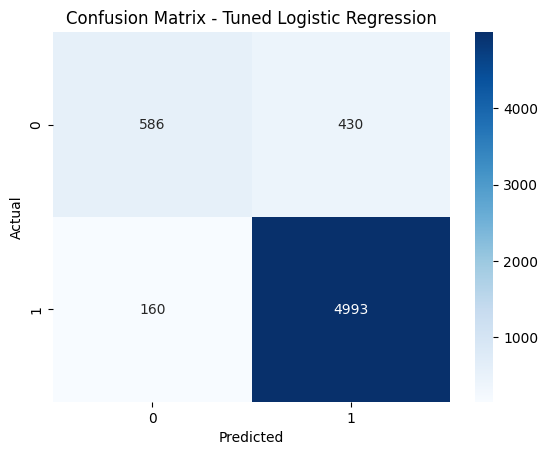


Model: Tuned Random Forest
Accuracy: 0.89
Precision: 0.90
Recall: 0.97
F1 Score: 0.94


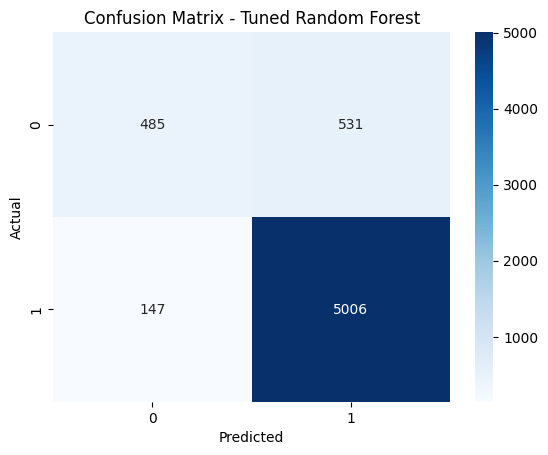


Model: Gradient Boosting
Accuracy: 0.88
Precision: 0.89
Recall: 0.98
F1 Score: 0.93


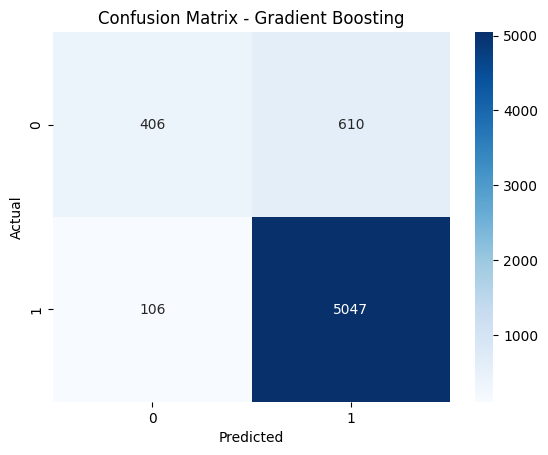

In [ ]:
# Step 9: Evaluate Models
# Logistic Regression
y_pred_logreg = best_logreg.predict(X_test_tfidf)
evaluate_model(y_test, y_pred_logreg, 'Tuned Logistic Regression')

# Random Forest
y_pred_rf = best_rf.predict(X_test_tfidf)
evaluate_model(y_test, y_pred_rf, 'Tuned Random Forest')

# Gradient Boosting
y_pred_gbc = gbc.predict(X_test_tfidf)
evaluate_model(y_test, y_pred_gbc, 'Gradient Boosting')